# Supervised learning - Classification

- Imbalanced dataset
- Ensamble classifiers

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.utils import resample

# Imbalanced dataset

In [56]:
df = pd.read_csv('https://homel.vsb.cz/~svo0175/nonsep.csv', sep=';', header=None)
df.columns = ['x', 'y', 'class']
df_imbalanced = df[df['class'] == -1].copy()
df_imbalanced = df_imbalanced.append(df[df['class'] == 1].sample(n=10, random_state=42))
print(df.shape)
print(df_imbalanced.shape)

(140, 3)
(80, 3)


Text(0.5, 1.0, 'Imbalanced dataset')

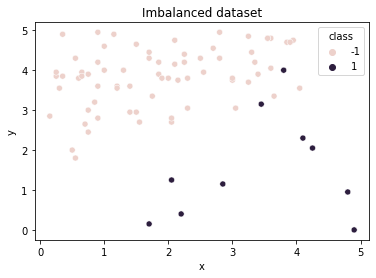

In [57]:
sns.scatterplot(data=df_imbalanced, x='x', y='y', hue='class')
plt.title('Imbalanced dataset')

## Train test split for evaluation
Be aware to do under/oversampling only for training split. Don't disturb class ratio in you test set of data. U want to have test set isolated from under/oversampling procedures, to mimic real data distribution for classificator evaluation. You add a lot of bias to the evaluation, when using under/oversampling methods for whole dataset.

In [58]:
df_train, df_test = train_test_split(df_imbalanced, test_size=0.5, stratify=df_imbalanced['class'], random_state=42)
X_train, X_test, y_train, y_test = df_train[df_train.columns[df_train.columns != 'class']].values, df_test[df_test.columns[df_test.columns != 'class']].values, df_train['class'].values, df_test['class'].values

Text(0.5, 1.0, 'Train set')

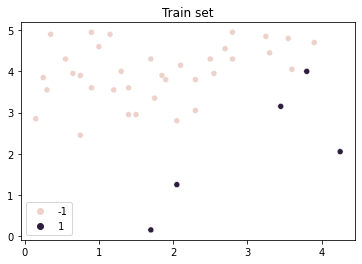

In [59]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title('Train set')

#### Class distribution in train set:

In [60]:
pd.Series(y_train).value_counts()

-1    35
 1     5
dtype: int64

In [61]:
clf = LinearSVC()
clf.fit(X_train, y_train)
print(f'train score is {f1_score(y_train, clf.predict(X_train))}')
print(f'test score is {f1_score(y_test, clf.predict(X_test))}')

train score is 0.888888888888889
test score is 0.7692307692307693


Text(0.5, 1.0, 'Evaluation of predictions on test set')

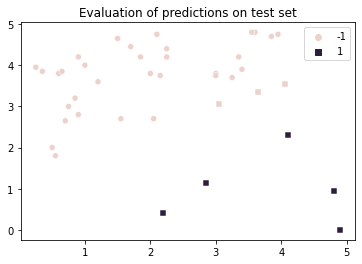

In [62]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, style=clf.predict(X_test), markers=['o','s'])
plt.title('Evaluation of predictions on test set')

## Undersampling

In [63]:
df_train_downsample = resample(df_train[df_train['class'] == -1],
             replace=True,
             n_samples=len(df_train[df_train['class'] == 1]),
             random_state=42)
df_train_downsample = df_train_downsample.append(df_train[df_train['class'] == 1])
df_train_downsample.shape

(10, 3)

In [64]:
X_train, y_train = df_train_downsample[df_train_downsample.columns[df_train_downsample.columns != 'class']].values, df_train_downsample['class'].values

Text(0.5, 1.0, 'Train set after downsampling')

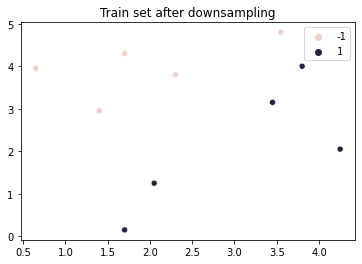

In [65]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title('Train set after downsampling')

#### Class distribution in train set:

In [66]:
pd.Series(y_train).value_counts()

-1    5
 1    5
dtype: int64

In [67]:
clf = LinearSVC()
clf.fit(X_train, y_train)
print(f'train score is {f1_score(y_train, clf.predict(X_train))}')
print(f'test score is {f1_score(y_test, clf.predict(X_test))}')

train score is 1.0
test score is 0.6666666666666666


Text(0.5, 1.0, 'Evaluation of predictions on test set')

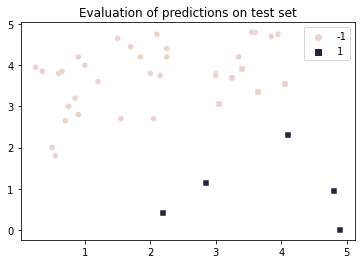

In [68]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, style=clf.predict(X_test), markers=['o','s'])
plt.title('Evaluation of predictions on test set')

## Oversampling

In [69]:
df_train_upsample = resample(df_train[df_train['class'] == 1],
             replace=True,
             n_samples=len(df_train[df_train['class'] == -1]),
             random_state=42)
df_train_upsample = df_train_upsample.append(df_train[df_train['class'] == -1])
df_train_upsample.shape

(70, 3)

In [70]:
X_train, y_train = df_train_upsample[df_train_upsample.columns[df_train_upsample.columns != 'class']].values, df_train_upsample['class'].values

Text(0.5, 1.0, 'Train set after upsampling')

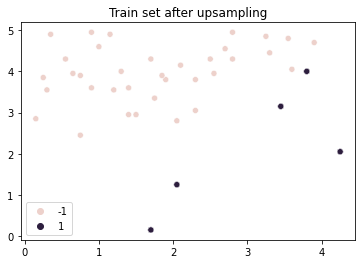

In [71]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title('Train set after upsampling')

#### Class distribution in train set:

In [72]:
pd.Series(y_train).value_counts()

 1    35
-1    35
dtype: int64

In [73]:
clf = LinearSVC()
clf.fit(X_train, y_train)
print(f'train score is {f1_score(y_train, clf.predict(X_train))}')
print(f'test score is {f1_score(y_test, clf.predict(X_test))}')

train score is 0.9859154929577464
test score is 0.6666666666666666


Text(0.5, 1.0, 'Evaluation of predictions on test set')

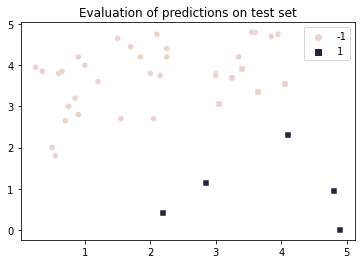

In [74]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, style=clf.predict(X_test), markers=['o','s'])
plt.title('Evaluation of predictions on test set')

## SMOTE

Instalation of Python library with SMOTE:

- ``pip install imbalanced-learn``

https://towardsdatascience.com/smote-synthetic-data-augmentation-for-tabular-data-1ce28090debc

In [75]:
from imblearn.over_sampling import SMOTE

su = SMOTE(random_state=42, k_neighbors=4)
X_train, y_train = df_train[df_train.columns[df_train.columns != 'class']].values, df_train['class'].values
X_train, y_train = su.fit_resample(X_train, y_train)
X_train.shape, y_train.shape

((70, 2), (70,))

Text(0.5, 1.0, 'Train set after SMOTE')

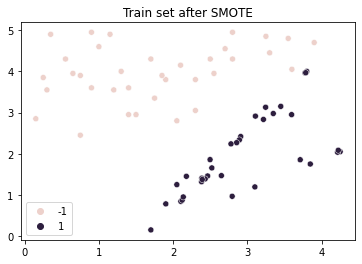

In [76]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title('Train set after SMOTE')

#### Class distribution in train set:

In [77]:
pd.Series(y_train).value_counts()

-1    35
 1    35
dtype: int64

In [78]:
clf = LinearSVC()
clf.fit(X_train, y_train)
print(f'train score is {f1_score(y_train, clf.predict(X_train))}')
print(f'test score is {f1_score(y_test, clf.predict(X_test))}')

train score is 0.9859154929577464
test score is 0.7692307692307693


Text(0.5, 1.0, 'Evaluation of predictions on test set')

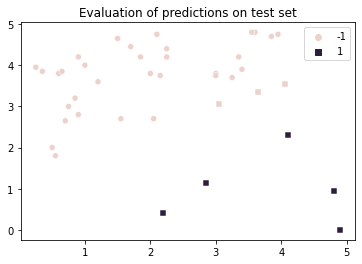

In [79]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, style=clf.predict(X_test), markers=['o','s'])
plt.title('Evaluation of predictions on test set')

### Imbalanced learn library
- U can find other methods for under/over sampling in library's documentation: https://imbalanced-learn.org/stable/references/index.html#api
- U can find similar methods as SMOTE for over sampling on following page: https://imbalanced-learn.org/stable/references/over_sampling.html

# Ensamble classifiers

Explain following terms:
- Bagging
- Boosting
- Stacking

Studing materials:
- Lectures - https://homel.vsb.cz/~pla06/
- https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/
- https://scikit-learn.org/stable/modules/ensemble.html#ensemble
- https://scikit-learn.org/stable/modules/classes.html?highlight=ensemble#module-sklearn.ensemble

# Individual tasks (3p)

## Task 1(2p):
Use RandomForestClassifier for prediction of survival class on Titanic dataset.

Tune parameters for this classifier, try at least 5 parameter's configurations and produce table or plot.


In [80]:
df = pd.read_csv('https://homel.vsb.cz/~svo0175/titanic.csv', index_col=0, sep=',')

df = df.drop(['Name', 'Ticket'], axis=1)
df.Cabin = df.Cabin.astype(str).apply(lambda x: x[0] if x != 'nan' else 'U').replace({'T': 'A'})

cabin_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'U']
enc_cabin = OrdinalEncoder(categories=[cabin_categories])
enc_cabin.fit_transform(df[['Cabin']])[:, 0]

df['Cabin'] = enc_cabin.fit_transform(df[['Cabin']])[:, 0]

sex_categories = ['male', 'female']
enc_sex = OrdinalEncoder(categories=[sex_categories])
df['Sex'] = enc_sex.fit_transform(df[['Sex']])[:, 0]

df.Age = df.Age.fillna(df.Age.mean())

df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked')], axis=1).drop('Embarked', axis=1)



In [81]:
def test_classifier(cls_cons, ds_train, ds_test):
    X_train, y_train = ds_train.loc[:, ds_train.columns != 'Survived'], ds_train.loc[:, 'Survived']
    X_test, y_test = ds_test.loc[:, ds_test.columns != 'Survived'], ds_test.loc[:, 'Survived']

    classifier = cls_cons()
    classifier.fit(X_train, y_train)
    
    pred = classifier.predict(X_test)
    return f1_score(y_test, pred)

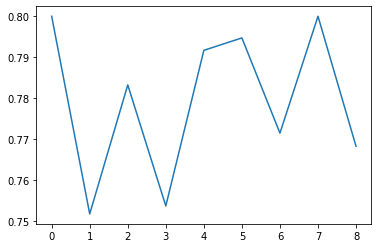

In [82]:
from sklearn.ensemble import RandomForestClassifier

df_train, df_test = train_test_split(df, test_size=0.2, random_state=747)

params = [
    {'n_estimators': 10, 'max_depth': 4},
    {'n_estimators': 10, 'max_depth': 6},
    {'n_estimators': 10, 'max_depth': None},
    
    {'n_estimators': 50, 'max_depth': 4},
    {'n_estimators': 50, 'max_depth': 6},
    {'n_estimators': 50, 'max_depth': None},
    
    {'n_estimators': 100, 'max_depth': 4},
    {'n_estimators': 100, 'max_depth': 6},
    {'n_estimators': 100, 'max_depth': None},
]

res = []

for i, p in enumerate(params):
    classifier = lambda: RandomForestClassifier(**p)
    score = test_classifier(classifier, df_train, df_test)
    res.append(score)


plt.plot(range(len(res)), res)

## Task 2(1p):
Do experiments with under or over sampling and decribe experiments results.

In [83]:
df_train['Survived'].value_counts()

0    453
1    259
Name: Survived, dtype: int64

In [84]:
df_train_upsample = resample(df_train[df_train['Survived'] == 1],
             replace=True,
             n_samples=len(df_train[df_train['Survived'] == 0]),
             random_state=42)

df_train_upsample = df_train_upsample.append(df_train[df_train['Survived'] == 0])


df_train_upsample['Survived'].value_counts()

1    453
0    453
Name: Survived, dtype: int64

In [85]:
df_train_downsample = resample(df_train[df_train['Survived'] == 0],
             replace=True,
             n_samples=len(df_train[df_train['Survived'] == 1]),
             random_state=42)
df_train_downsample = df_train_downsample.append(df_train[df_train['Survived'] == 1])

df_train_downsample['Survived'].value_counts()

0    259
1    259
Name: Survived, dtype: int64

In [86]:
su = SMOTE(random_state=747, k_neighbors=4)

X_train, y_train = df_train[df_train.columns[df_train.columns != 'Survived']].values, df_train['Survived'].values

X_train, y_train = su.fit_resample(X_train, y_train)

cols = list(df_train.columns)
cols.remove('Survived')

df_train_smote = pd.DataFrame(data=X_train, columns=cols)
df_train_smote['Survived'] = y_train

In [87]:
classifier = lambda: RandomForestClassifier()

print(f'{test_classifier(classifier, df_train_upsample, df_test)=}')
print(f'{test_classifier(classifier, df_train_downsample, df_test)=}')
print(f'{test_classifier(classifier, df_train_smote, df_test)=}')


test_classifier(classifier, df_train_upsample, df_test)=0.7733333333333333
test_classifier(classifier, df_train_downsample, df_test)=0.7613636363636364
test_classifier(classifier, df_train_smote, df_test)=0.8104575163398692


## For fun:
Try other ensemble methods.

Experiment with various methods for under or over sampling.